# IMPORT LIBRARIES AND PACKAGES

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import make_classification,load_breast_cancer,make_gaussian_quantiles
from scipy.optimize import minimize
import seaborn as sns
import requests

# DATASET GENERATION/LOADING AND PREPROCESSING

**IMPORTANT** Comment out except for one data loader or only run one of the following cell blocks.

In [2]:
# Synthetic Linearly Separable 2D Dataset
n = 10000 # number of samples
dim = 2
class_separation = 0.2 # distance between two classes 
p = 0.5
r = 200 # range of data
temp_label_neg = [] # label -1
temp_label_pos = [] # label +1
while len(temp_label_pos) < int(n*(1-p)):
    x1 = random.randint(-r,r)
    x2 = random.randint(-r,r)
    if x1 - class_separation/2 * r >= x2:
        temp_label_pos.append((x1,x2))
while len(temp_label_neg) < int(n*p):
    x1 = random.randint(-r,r)
    x2 = random.randint(-r,r)
    if x1 + class_separation/2 * r <= x2:
        temp_label_neg.append((x1,x2)) 

X = np.vstack((temp_label_neg,temp_label_pos))
label = np.hstack((np.zeros(len(temp_label_neg)),np.ones(len(temp_label_pos))))

In [2]:
# Synthetic Linearly Inseparable 2D Dataset
n = 10000
dim = 2
X1, y1 = make_gaussian_quantiles(cov=2,
                                 n_samples=int(n/2), n_features=dim,
                                 n_classes=2)
X2, y2 = make_gaussian_quantiles(mean=(5,5), cov=2,
                                 n_samples=int(n/2), n_features=dim,
                                 n_classes=2)


X = np.concatenate((X1, X2))
label = np.concatenate((y1,-y2+1))
label = label.reshape(-1,1)

In [ ]:
# Synthetic Linearly Inseparable High Dimensional Dataset
n = 10000
dim = 5
X, label = make_classification(n_samples=n, n_features=dim, n_redundant=1, n_informative=dim-1,
                                n_classes=2, n_clusters_per_class=dim-1, flip_y = 0,weights= (0.5,0.5))

In [ ]:
# UCI Heart Disease Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
hd= pd.read_csv(url, header=None)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
hd.columns = column_names
hd['target'] = hd['target'].replace([1, 2, 3, 4], 1)
hd = hd.apply(pd.to_numeric, errors='coerce')
hd = hd.dropna()
hd = np.array(hd)
label = hd[:,hd.shape[1]-1]
X = hd[:,0:hd.shape[1]]
dim = X.shape[1]
n = len(label)


In [ ]:
# UCI Adult Dataset 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
ad= pd.read_csv(url, header=None)
column_names =['age', 'job', 'fnlwgt', 'edu', 'edunum', 'married', 'work', 'relationship', 'race', 'sex','capitalgain','capitalloss','hrsweek','country','Class']
ad.columns = column_names
ad['Class'] = ad['Class'].replace('<=50K', 0)
ad['Class'] = ad['Class'].replace('>50K', 1)
string_cols = ad.select_dtypes(include=['object']).columns
num_cols = ad.select_dtypes(include=['int', 'float']).columns
for col in string_cols:
    le = LabelEncoder()
    ad[col] = le.fit_transform(ad[col])
ohe = OneHotEncoder(sparse=False)
encoded_category = ohe.fit_transform(ad[['Class']])
ad.drop('Class', axis=1, inplace=True)
ad_encoded = pd.concat([ad, pd.DataFrame(encoded_category, columns=['category_0', 'category_1'])], axis=1)
ad_encoded = np.array(ad_encoded)
label = ad_encoded[:,ad_encoded.shape[1]-1]
X = ad_encoded[:,0:ad_encoded.shape[1]-2]
dim = X.shape[1]
n = len(label)


In [ ]:
# UCI Ionosphere Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
bn= pd.read_csv(url, header=None)
column_names = [str(i) for i in range(1, 36)]
bn.columns = column_names
bn['35'] = bn['35'].replace('g', 1)
bn['35'] = bn['35'].replace('b', 0)
bn = np.array(bn)
label = bn[:,bn.shape[1]-1]
X = bn[:,0:bn.shape[1]-1]
dim = X.shape[1]
n = len(label)


In [ ]:
# UCI Credit Screening Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
crx= pd.read_csv(url, header=None)
column_names =[str(i) for i in range(1, 17)]
crx.columns = column_names
crx['16'] = crx['16'].replace('-', 0)
crx['16'] = crx['16'].replace('+', 1)
string_cols = crx.select_dtypes(include=['object']).columns
num_cols = crx.select_dtypes(include=['int', 'float']).columns
for col in string_cols:
    le = LabelEncoder()
    crx[col] = le.fit_transform(crx[col])
ohe = OneHotEncoder(sparse=False)
encoded_category = ohe.fit_transform(crx[['16']])
crx.drop('16', axis=1, inplace=True)
crx_encoded = pd.concat([crx, pd.DataFrame(encoded_category, columns=['category_0', 'category_1'])], axis=1)
crx_encoded = np.array(crx_encoded)
label = crx_encoded[:,crx_encoded.shape[1]-1]
X = crx_encoded[:,0:crx_encoded.shape[1]-2]
dim = X.shape[1]
n = len(label)


In [ ]:
# UCI Banknote Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
bn= pd.read_csv(url, header=None)
column_names =['wv0', 'wv1', 'wv2', 'wv3', 'Class']
bn.columns = column_names
bn = np.array(bn)
label = bn[:,bn.shape[1]-1]
X = bn[:,0:bn.shape[1]-1]
dim = X.shape[1]
n = len(label)

In [ ]:
# UCI Breast Cancer Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
bc= pd.read_csv(url, header=None)
column_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Class']
bc.columns = column_names
bc['Class'] = bc['Class'].replace(2, 0)
bc['Class'] = bc['Class'].replace(4, 1)
bc = bc.apply(pd.to_numeric, errors='coerce')
bc = bc.dropna()
bc = np.array(bc)
bc1 = np.delete(bc, 0, axis=1)
label = bc[:,bc.shape[1]-1]
X = bc[:,0:bc.shape[1]]
dim = X.shape[1]
n = len(label)

# ---$\uparrow$---END of Dataset Selection---$\uparrow$---

# GENERATE NOISY TRAIN/TEST DATA

In [3]:
# Noise Rate
rho_neg = 0.4
rho_pos = 0.4

data_neg = []
data_pos = []
for d in np.hstack((X, label.reshape(-1,1))):
    if d[dim] == 0:
        data_neg.append(np.hstack((d[:dim], -1)))
    else:
        data_pos.append(d)        
data_neg = np.array(data_neg)
data_pos = np.array(data_pos)

# Create data with no label noise and map the first two column to third column
data_clean = np.vstack((data_neg,data_pos))
map = {}
for D in data_clean:
    key = tuple(D[:dim])
    value = D[dim]
    map[key] = value
    


noise_neg = np.random.choice([0, 1], size=len(data_neg), p=[(1-rho_neg), rho_neg])
data_neg[:,dim][noise_neg == 1] = 1
noise_pos = np.random.choice([0, 1], size=len(data_pos), p=[(1-rho_pos), rho_pos])
data_pos[:,dim][noise_pos == 1] = -1

data_noisy = np.vstack((data_neg, data_pos))

data_train, data_test, clean_train, clean_test  = train_test_split(data_noisy, data_clean,train_size=0.75)

# BASELINE METHOD

In [4]:
# Baseline method
dlf = svm.SVC(kernel="rbf")
dlf.fit(data_train[:,0:dim], data_train[:,dim])

pred_base = dlf.predict(data_test[:,0:dim])

acc = accuracy_score(clean_test[:,dim], pred_base)
print("Accuracy: {:0.4f}".format(acc))

# Project data to two dimension(only for synthetic datasets)
recon_base= {(D[0],D[1]):int(label) for label, D in zip(pred_base,data_test[:,0:dim])}
recon_array_base = np.array([(D[0], D[1], value) for D, value in recon_base.items()])

Accuracy: 0.8744


# IMPLEMENTATION METHOD

In [7]:
def modified_loss(y_true, y_pred, rho_pos, rho_neg):
    original_loss_pos = np.maximum(0, 1 - y_true * y_pred) # l(t,y)
    original_loss_neg = np.maximum(0, 1 - (-y_true) * y_pred) # l(t,-y)

    # Compute modified loss
    mod_neg = ((1 - rho_pos) * original_loss_neg - rho_neg * original_loss_pos)
    mod_pos = ((1 - rho_neg) * original_loss_pos - rho_pos * original_loss_neg)

    modified_loss = (mod_neg + mod_pos)/(1 - rho_pos - rho_neg)
    return  modified_loss

In [8]:
# Implmentation
clf = svm.SVC(kernel='rbf')
clf.fit(data_train[:,0:dim], data_train[:,dim])
ini_pred = clf.predict(data_train[:,0:dim])

clf.fit(data_train[:,0:dim], data_train[:,dim], sample_weight = 
        ((np.array(([modified_loss(true_label, pred_label, rho_pos, rho_neg) for true_label, pred_label in zip(data_train[:,dim], ini_pred)])))))

y_pred = clf.predict(data_test[:,0:dim])

accuracy = accuracy_score(clean_test[:,dim], y_pred)
print("Accuracy: {:0.4f}".format(accuracy))

# Project data to two dimension (only for synthetic datasets)
recon = {(D[0],D[1]):int(label) for label, D in zip(y_pred, data_test[:,0:dim])}
recon_array = np.array([(key[0], key[1], value) for key, value in recon.items()])

Accuracy: 0.8924


# PLOT (ONLY FOR SYNTHETIC DATASETS)

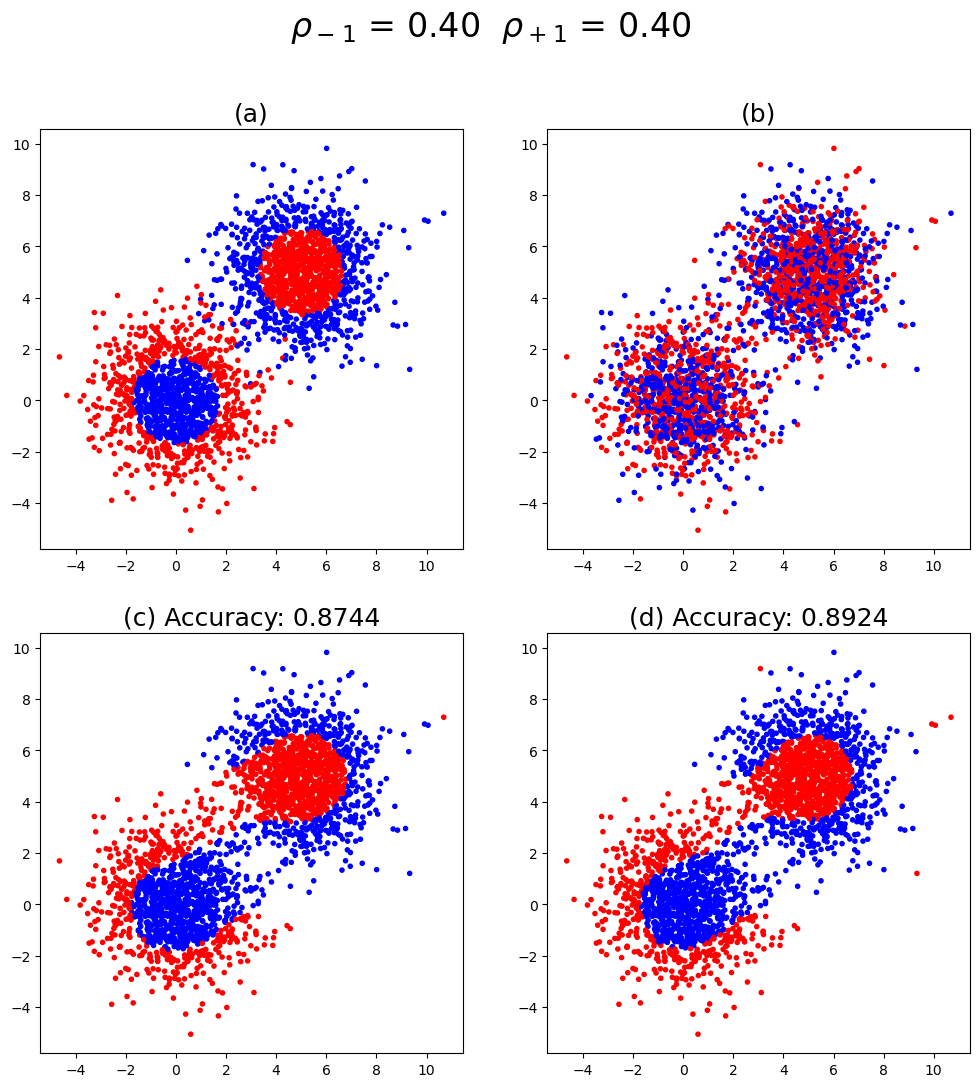

In [9]:
# Only for synthetic datasets
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('$\u03C1_-$$_1$ = {:0.2f} '.format(rho_neg) + ' $\u03C1_+$$_1$ = {:0.2f}'.format(rho_pos), fontsize=24)
ax1.scatter(clean_test[:,0], clean_test[:,1], c=np.where(clean_test[:,dim]==1, 'red', 'blue'), marker='.')
ax2.scatter(data_test[:,0], data_test[:,1], c=np.where(data_test[:,dim]==1, 'red', 'blue'), marker='.')
ax3.scatter(recon_array_base[:,0], recon_array_base[:,1], c=np.where(recon_array_base[:,2]==1, 'red', 'blue'), marker='.')
ax4.scatter(recon_array[:,0], recon_array[:,1], c=np.where(recon_array[:,2]==1, 'red', 'blue'), marker='.')
ax1.set_title('(a)', fontsize=18)
ax2.set_title('(b)', fontsize=18)
ax3.set_title('(c) Accuracy: {:0.4f}'.format(acc), fontsize=18)
ax4.set_title('(d) Accuracy: {:0.4f}'.format(accuracy), fontsize=18)
plt.show()